<a href="https://colab.research.google.com/github/sebastian-dv/CSE-151A-Project/blob/main/Another_copy_of_SUPPORT2_Model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSE 151A Group Project
# Names

- Pranav Prabu
- Sebastian Diaz
- Jou-Chih Chang
- Juan Yin
- Irving Zhao
- Xianzhe Guo
- Tiankuo Li

In [171]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [172]:
df = pd.read_csv('https://archive.ics.uci.edu/static/public/880/data.csv')

df = df[['age','sex','death','dzgroup','scoma','race','sps','aps','diabetes','dementia','meanbp','wblc','hrt','resp','temp','pafi','alb','bili','crea','sod','ph']]

## Initial Preprocessing

In [173]:
# one hot encoding race
ohe = pd.get_dummies(df[['race']])
df = df.drop(['race'], axis = 1)
df = pd.concat([df, ohe], axis = 1)

# dropping nan values
df = df.dropna(axis = 0, how = 'any')

# encoding sex
df['sex'].replace('female', 0, inplace=True)
df['sex'].replace('male', 1, inplace=True)

# one hot encoding dzgroup
ohe = pd.get_dummies(df[['dzgroup']])
df = df.drop(['dzgroup'], axis = 1)

X = df.copy()
y = ohe.copy()
df = pd.concat([df, ohe], axis = 1)

# scaling data
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

<ipython-input-173-7ef086a03f83>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'].replace('female', 0, inplace=True)
<ipython-input-173-7ef086a03f83>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'].replace('male', 1, inplace=True)


In [174]:
X.head()

,age,sex,death,scoma,sps,aps,diabetes,dementia,meanbp,wblc,...,alb,bili,crea,sod,ph,race_asian,race_black,race_hispanic,race_other,race_white
0,0.544507,1.0,0.0,0.00,0.333700,0.139860,0.0,0.0,0.538889,0.046591,...,0.048945,0.001590,0.060112,0.476923,0.675213,0.0,0.0,0.0,1.0,0.0
1,0.538672,1.0,1.0,0.00,0.164275,0.321678,0.0,0.0,0.433333,0.090846,...,0.153840,0.004769,0.081967,0.338462,0.699633,0.0,0.0,0.0,0.0,1.0
2,0.554409,0.0,1.0,0.26,0.398999,0.405594,0.0,0.0,0.383333,0.233711,...,0.087410,0.220986,0.153014,0.307692,0.661783,0.0,0.0,0.0,0.0,1.0
3,0.383276,0.0,0.0,0.00,0.311257,0.293706,0.0,0.0,0.372222,0.085416,...,0.055945,0.063587,0.027324,0.307692,0.599511,0.0,0.0,0.0,0.0,1.0
4,0.434763,1.0,1.0,0.00,0.132662,0.111888,0.0,0.0,0.744444,0.060566,...,0.118875,0.006359,0.038251,0.476923,0.575091,0.0,0.0,0.0,0.0,1.0


In [ ]:
y.head()

,dzgroup_ARF/MOSF w/Sepsis,dzgroup_CHF,dzgroup_COPD,dzgroup_Cirrhosis,dzgroup_Colon Cancer,dzgroup_Coma,dzgroup_Lung Cancer,dzgroup_MOSF w/Malig
0,0,0,0,0,0,0,1,0
6,0,1,0,0,0,0,0,0
17,1,0,0,0,0,0,0,0
22,1,0,0,0,0,0,0,0
25,0,0,1,0,0,0,0,0


In [ ]:
X.shape

(3840, 24)

# Model 2
1. Hyperparameter Tuning

In [175]:
from keras.optimizers import SGD
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import RepeatedKFold, cross_val_score

In [176]:
!pip install keras-tuner -q

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

In [178]:
def buildmodel():
    model = Sequential([
        Dense(units = 42, activation = 'tanh', input_dim = 24),
        Dense(units = 72, activation = 'tanh'),
        Dense(units = 72, activation = 'tanh'),
        Dense(units = 8, activation = 'softmax')
    ])
    model.compile(optimizer ='SGD', loss='categorical_crossentropy')
    return(model)

In [179]:
classifier = buildmodel()
history = classifier.fit(X_train.astype(float), y_train, batch_size = 20, validation_split=0.2, epochs = 100, verbose = 0)
yhat_test = classifier.predict(X_test.astype(float))
yhat_test

24/24 [==============================] - 0s 2ms/step


array([[0.7617064 , 0.00834605, 0.0251055 , ..., 0.0012524 , 0.00151935,
        0.17572027],
       [0.39907932, 0.31098053, 0.1636201 , ..., 0.0664033 , 0.02889662,
        0.00745171],
       [0.05977619, 0.00109695, 0.00860975, ..., 0.91965604, 0.0020693 ,
        0.00553791],
       ...,
       [0.7077572 , 0.01152373, 0.03848453, ..., 0.00417189, 0.00948055,
        0.18631919],
       [0.29381526, 0.03696457, 0.1287586 , ..., 0.01838709, 0.32359648,
        0.12057887],
       [0.6810642 , 0.0057323 , 0.01621348, ..., 0.01668807, 0.02217394,
        0.21499132]], dtype=float32)

In [180]:
y_label = y_test.to_numpy()
actual = np.argmax(y_label, axis=1)
pred = np.argmax(yhat_test, axis=1)
print(classification_report(actual,pred))

              precision    recall  f1-score   support

           0       0.56      0.90      0.69       344
           1       0.52      0.30      0.38       103
           2       0.49      0.33      0.40        84
           3       0.50      0.07      0.13        41
           4       0.00      0.00      0.00        16
           5       0.78      0.54      0.64        65
           6       0.36      0.35      0.35        46
           7       1.00      0.03      0.06        69

    accuracy                           0.55       768
   macro avg       0.53      0.32      0.33       768
weighted avg       0.58      0.55      0.49       768



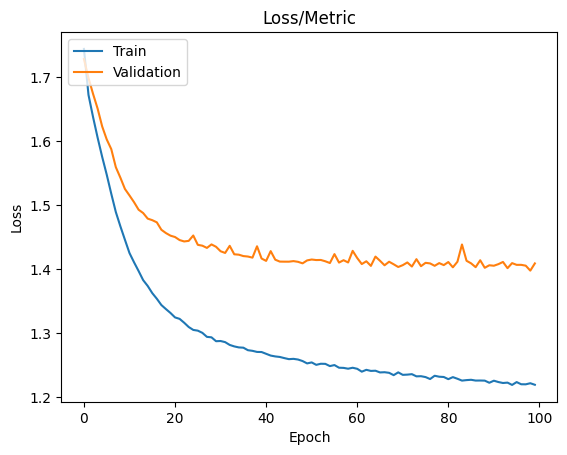

In [181]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss/Metric')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [182]:
import tensorflow as tf
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0
)

In [183]:
import keras
import keras_tuner
from keras import layers
#build the hyperparameter tuning model with tuning the units, activation function, and learning rates
def build_model(hp):
    model = Sequential()
    model.add(layers.Dense(units=hp.Int('input_units', min_value=16, max_value=128, step=16),
                    activation=hp.Choice('input_activation', values=['relu', 'tanh', 'sigmoid']),
                    input_dim=X_train.shape[1]))

    for i in range(3):
        model.add(layers.Dense(units=hp.Int("units", min_value=16, max_value=128, step=16),
                        activation=hp.Choice("activation", values=['relu', 'tanh', 'sigmoid'])))

    model.add(layers.Dense(units=8, activation="softmax"))

    learning_rate = hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log')
    optimizer = hp.Choice("optimizer", values = ["sgd", "adam", "rmsprop"])
    if optimizer == "sgd":
        optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
    elif optimizer == "adam":
        optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == "rmsprop":
        optimizer = keras.optimizers.RMSprop(learning_rate=learning_rate)

    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

In [184]:
tuner = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=10,
    overwrite=True,
    directory="my_dir",
    project_name="hypertune",
)

In [185]:
#tuner.search(X_train, y_train, epochs=50, validation_split=0.2)
tuner.search(X_train, y_train, epochs=50, validation_split=0.1, callbacks = [early_stopping])

Trial 10 Complete [00h 00m 17s]
val_accuracy: 0.43831169605255127

Best val_accuracy So Far: 0.5064935088157654
Total elapsed time: 00h 02m 35s


In [186]:
tuner.results_summary(num_trials=1)

Results summary
Results in my_dir/hypertune
Showing 1 best trials
Objective(name="val_accuracy", direction="max")

Trial 07 summary
Hyperparameters:
input_units: 128
input_activation: sigmoid
units: 32
activation: tanh
learning_rate: 0.00013705602099255737
optimizer: rmsprop
Score: 0.5064935088157654


In [187]:
models = tuner.get_best_models(num_models=1)
best_model = models[0]
best_model.summary()

Model: "sequential"
_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 dense (Dense)               (None, 128)               3200      


 dense_1 (Dense)             (None, 32)                4128      


                                                                 
 dense_2 (Dense)             (None, 32)                1056      


 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 8)                 264       
                                                                 
Total params: 9704 (37.91 KB)
Trainable params: 9704 (37.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [188]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train.astype(float), y_train,epochs=100,validation_split=0.1, verbose = 0)

24/24 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.60      0.80      0.68       344
           1       0.42      0.21      0.28       103
           2       0.30      0.43      0.35        84
           3       0.00      0.00      0.00        41
           4       0.00      0.00      0.00        16
           5       0.73      0.54      0.62        65
           6       0.30      0.54      0.38        46
           7       1.00      0.03      0.06        69

    accuracy                           0.51       768
   macro avg       0.42      0.32      0.30       768
weighted avg       0.52      0.51      0.46       768



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


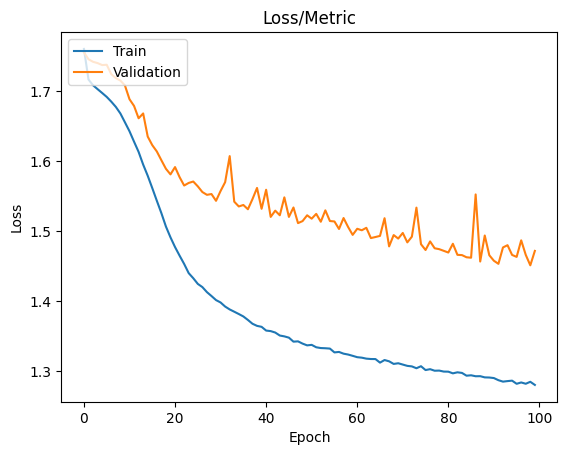

In [189]:
y_label = y_test.to_numpy()
yhat_test = model.predict(X_test.astype(float))
actual = np.argmax(y_label, axis=1)
pred = np.argmax(yhat_test, axis=1)
print(classification_report(actual,pred))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss/Metric')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [190]:
from sklearn.preprocessing import LabelEncoder
myle=LabelEncoder()
df = pd.read_csv('https://archive.ics.uci.edu/static/public/880/data.csv')

df = df[['age','sex','death','dzgroup','scoma','race','sps','aps','diabetes','dementia','meanbp','wblc','hrt','resp','temp','pafi','alb','bili','crea','sod','ph']]
# label encoding race
df['race'] = myle.fit_transform(df['race'])
# dropping nan values
df = df.dropna(axis = 0, how = 'any')

# encoding sex
df['sex'].replace('female', 0, inplace=True)
df['sex'].replace('male', 1, inplace=True)
print(df['dzgroup'].value_counts())
y = df['dzgroup']
X = df.drop(columns = 'dzgroup')

ARF/MOSF w/Sepsis    1725
CHF                   473
COPD                  447
MOSF w/Malig          338
Coma                  265
Cirrhosis             248
Lung Cancer           246
Colon Cancer           98
Name: dzgroup, dtype: int64


In [191]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
print(y_res.value_counts())
ohe = OneHotEncoder()
myohedzgroup = ohe.fit_transform(y_res.values.reshape(-1,1)).toarray()
y_res_ohe = pd.DataFrame(myohedzgroup, columns=ohe.categories_[0])

Lung Cancer          1725
CHF                  1725
ARF/MOSF w/Sepsis    1725
COPD                 1725
MOSF w/Malig         1725
Cirrhosis            1725
Colon Cancer         1725
Coma                 1725
Name: dzgroup, dtype: int64


In [192]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res_ohe, test_size=0.2, random_state = 0)

In [193]:
tuner2 = keras_tuner.RandomSearch(
    hypermodel=build_model,
    objective="val_accuracy",
    max_trials=10,
    overwrite=True,
    directory="my_dir",
    project_name="hypertune",
)
tuner2.search(X_train, y_train, epochs=50, validation_split=0.1, callbacks = [early_stopping])

Trial 10 Complete [00h 00m 43s]
val_accuracy: 0.35326087474823

Best val_accuracy So Far: 0.7128623127937317
Total elapsed time: 00h 09m 11s


87/87 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.71      0.45      0.55       318
           1       0.84      0.57      0.68       337
           2       0.64      0.88      0.74       349
           3       0.81      0.95      0.88       348
           4       0.96      0.97      0.96       327
           5       0.94      0.99      0.96       364
           6       0.93      0.80      0.86       356
           7       0.77      0.89      0.83       361

    accuracy                           0.82      2760
   macro avg       0.82      0.81      0.81      2760
weighted avg       0.83      0.82      0.81      2760



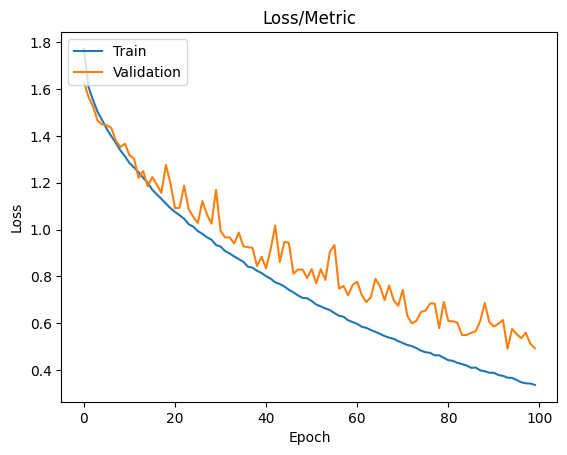

In [195]:
best_hps = tuner2.get_best_hyperparameters(num_trials=1)[0]
model = tuner2.hypermodel.build(best_hps)
history = model.fit(X_train.astype(float), y_train,epochs=100,validation_split=0.1, verbose = 0)
y_label = y_test.to_numpy()
yhat_test = model.predict(X_test.astype(float))
actual = np.argmax(y_label, axis=1)
pred = np.argmax(yhat_test, axis=1)
print(classification_report(actual,pred))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss/Metric')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()